### Regan Alt - Assignment 3 Part B - 06/21/2021

## Beautiful Soup

### 1) Locate the <table> element in the page corresponding to the Treasury yields

In [90]:
# import requests to access the web page
from bs4 import BeautifulSoup # to parse html and navigate html tree
import requests
import pandas as pd

In [91]:
# retreive data from URL
urlString = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2021'
page = requests.get(urlString)
soup = BeautifulSoup(page.content)
print(soup.title.text)


	
	 Daily Treasury Yield Curve Rates 
    




In [92]:
# Finding the table using the particular index of it
tables = soup.find_all("table") # get all the tables on the page
ratesTable = tables[1] # get the table an index 1 (second table)
print(ratesTable.prettify())

<table class="t-chart" xmlns:a="http://www.w3.org/2005/Atom" xmlns:d="http://schemas.microsoft.com/ado/2007/08/dataservices" xmlns:fmt="urn:treasury-xslt-fmt" xmlns:m="http://schemas.microsoft.com/ado/2007/08/dataservices/metadata" xmlns:msxml="urn:schemas-microsoft-com:xslt">
 <tr>
  <th scope="col">
   Date
  </th>
  <th scope="col">
   1 mo
  </th>
  <th scope="col">
   2 mo
  </th>
  <th scope="col">
   3 mo
  </th>
  <th scope="col">
   6 mo
  </th>
  <th scope="col">
   1 yr
  </th>
  <th scope="col">
   2 yr
  </th>
  <th scope="col">
   3 yr
  </th>
  <th scope="col">
   5 yr
  </th>
  <th scope="col">
   7 yr
  </th>
  <th scope="col">
   10 yr
  </th>
  <th scope="col">
   20 yr
  </th>
  <th scope="col">
   30 yr
  </th>
 </tr>
 <tr class="oddrow">
  <td class="text_view_data" scope="row">
   01/04/21
  </td>
  <td class="text_view_data">
   0.09
  </td>
  <td class="text_view_data">
   0.09
  </td>
  <td class="text_view_data">
   0.09
  </td>
  <td class="text_view_data">


### 2) Access the last row in the table, using Beautiful Soup (as opposed to pandas) methods.

In [93]:
# Get the yield curve data into a Dataframe
# Build parallel lists corresponding to the data in the page
col0 = []
col1 = []
col3 = []
col4 = []
col5 = []
col6 = []
col8 = []
col10 = []
col12 = []
#tableBody = first_table.find('tbody')
tableRows = ratesTable.find_all('tr') # within the found node, find all the <tr> (rows)
for row in tableRows:
    cells = row.findAll('td') # within the row, find each <td> (cell)
    if (len(cells) > 0):
       cell0 = cells[0].text.strip()
       col0.append(cell0)
        
       cell1 = cells[1].text.strip()
       col1.append(cell1)
        
       cell3 = cells[3].text.strip()
       col3.append(cell3)
        
       cell4 = cells[4].text.strip()
       col4.append(cell4)
        
       cell5 = cells[5].text.strip()
       col5.append(cell5)
        
       cell6 = cells[6].text.strip()
       col6.append(cell6)
        
       cell8 = cells[8].text.strip()
       col8.append(cell8)
        
       cell10 = cells[10].text.strip()
       col10.append(cell10)
        
       cell12 = cells[12].text.strip()
       col12.append(cell12)

       print(cell0, cell1, cell3, cell4, cell5, cell6, cell8, cell10, cell12, sep="|")

01/04/21|0.09|0.09|0.09|0.10|0.11|0.36|0.93|1.66
01/05/21|0.08|0.09|0.09|0.10|0.13|0.38|0.96|1.70
01/06/21|0.09|0.09|0.09|0.11|0.14|0.43|1.04|1.81
01/07/21|0.09|0.09|0.09|0.11|0.14|0.46|1.08|1.85
01/08/21|0.08|0.08|0.09|0.10|0.14|0.49|1.13|1.87
01/11/21|0.09|0.08|0.10|0.10|0.14|0.50|1.15|1.88
01/12/21|0.09|0.09|0.09|0.11|0.14|0.50|1.15|1.88
01/13/21|0.09|0.09|0.10|0.12|0.14|0.48|1.10|1.82
01/14/21|0.09|0.09|0.09|0.10|0.16|0.49|1.15|1.88
01/15/21|0.08|0.09|0.10|0.10|0.13|0.46|1.11|1.85
01/19/21|0.07|0.09|0.11|0.10|0.14|0.45|1.10|1.84
01/20/21|0.08|0.08|0.10|0.10|0.13|0.45|1.10|1.84
01/21/21|0.07|0.09|0.09|0.10|0.13|0.45|1.12|1.87
01/22/21|0.07|0.08|0.10|0.10|0.13|0.44|1.10|1.85
01/25/21|0.07|0.09|0.09|0.10|0.13|0.42|1.05|1.80
01/26/21|0.05|0.07|0.09|0.09|0.11|0.42|1.05|1.80
01/27/21|0.05|0.08|0.09|0.09|0.12|0.41|1.04|1.79
01/28/21|0.05|0.07|0.08|0.08|0.12|0.42|1.07|1.81
01/29/21|0.07|0.06|0.07|0.10|0.11|0.45|1.11|1.87
02/01/21|0.06|0.07|0.08|0.08|0.11|0.42|1.09|1.84
02/02/21|0.04|0.07|0

In [94]:
# from the parallel lists above, create a DataFrame using a dictionary
import pandas as pd
df = pd.DataFrame({
                   "1mo":col1,
                   "3mo":col3,
                   "6mo":col4,
                   "1yr":col5,
                   "2yr":col6,
                   "5yr":col8,
                   "10yr":col10,
                   "30yr":col12
                  },
                  index=col0
                  )
df

,1mo,3mo,6mo,1yr,2yr,5yr,10yr,30yr
01/04/21,0.09,0.09,0.09,0.10,0.11,0.36,0.93,1.66
01/05/21,0.08,0.09,0.09,0.10,0.13,0.38,0.96,1.70
01/06/21,0.09,0.09,0.09,0.11,0.14,0.43,1.04,1.81
01/07/21,0.09,0.09,0.09,0.11,0.14,0.46,1.08,1.85
01/08/21,0.08,0.08,0.09,0.10,0.14,0.49,1.13,1.87
...,...,...,...,...,...,...,...,...
06/15/21,0.02,0.03,0.05,0.08,0.16,0.79,1.51,2.20
06/16/21,0.04,0.04,0.06,0.08,0.21,0.89,1.57,2.20
06/17/21,0.05,0.04,0.06,0.08,0.23,0.90,1.52,2.11
06/18/21,0.05,0.05,0.06,0.09,0.26,0.89,1.45,2.01


In [106]:
# access the last row of the interest rate table
lastrow = df.iloc[-1:]
lastrow

,1mo,3mo,6mo,1yr,2yr,5yr,10yr,30yr
06/21/21,0.04,0.05,0.06,0.09,0.27,0.90,1.50,2.11


In [109]:
#check datatype of last row
lastrow.dtypes

1mo     object
3mo     object
6mo     object
1yr     object
2yr     object
5yr     object
10yr    object
30yr    object
dtype: object

In [112]:
# turning last row data to float objects
maxdate = lastrow.astype('float')
maxdate.dtypes

1mo     float64
3mo     float64
6mo     float64
1yr     float64
2yr     float64
5yr     float64
10yr    float64
30yr    float64
dtype: object

### 3) Similar to part A step 6, plot the latest yield curve (last row of the table). Make sure your plot uses numeric (as opposed to string) data values

In [121]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd

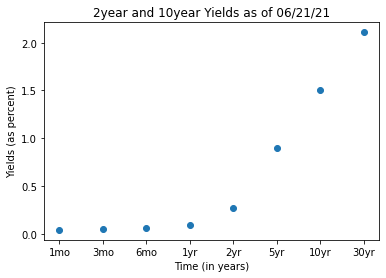

In [122]:
#create scatterplot for 2 yr and 10 yr yields
import matplotlib.pyplot as plt
plt.scatter(periods, maxdate)

plt.title('2year and 10year Yields as of 06/21/21')
plt.xlabel('Time (in years)')
plt.ylabel('Yields (as percent)')
plt.show()